# IRx

**IRx** aims to provide a translator to LLVM-IR from
[**ASTx**](https://github.com/arxlang/astx) objects.

## Getting Started

First, check our documentation about the [installation](/installation).

Now, let's import our library:

In [1]:
from irx import ast
from irx.builders.llvmliteir import LLVMLiteIR

In [2]:
builder = LLVMLiteIR()
module = builder.module()

decl_a = ast.VariableDeclaration(name="a", type_=ast.Int32, value=ast.LiteralInt32(1))
decl_b = ast.VariableDeclaration(name="b", type_=ast.Int32, value=ast.LiteralInt32(2))
decl_c = ast.VariableDeclaration(name="c", type_=ast.Int32, value=ast.LiteralInt32(4))

a = ast.Variable(name="a")
b = ast.Variable(name="b")
c = ast.Variable(name="c")

lit_1 = ast.LiteralInt32(1)

basic_op = lit_1 + b - a * c / a + (b - a + c / a)

main_proto = ast.FunctionPrototype(
    name="main", args=[], return_type=ast.Int32
)
main_block = ast.Block()
main_block.append(decl_a)
main_block.append(decl_b)
main_block.append(decl_c)
main_block.append(ast.FunctionReturn(basic_op))
main_fn = ast.Function(prototype=main_proto, body=main_block)

module.block.append(main_fn)

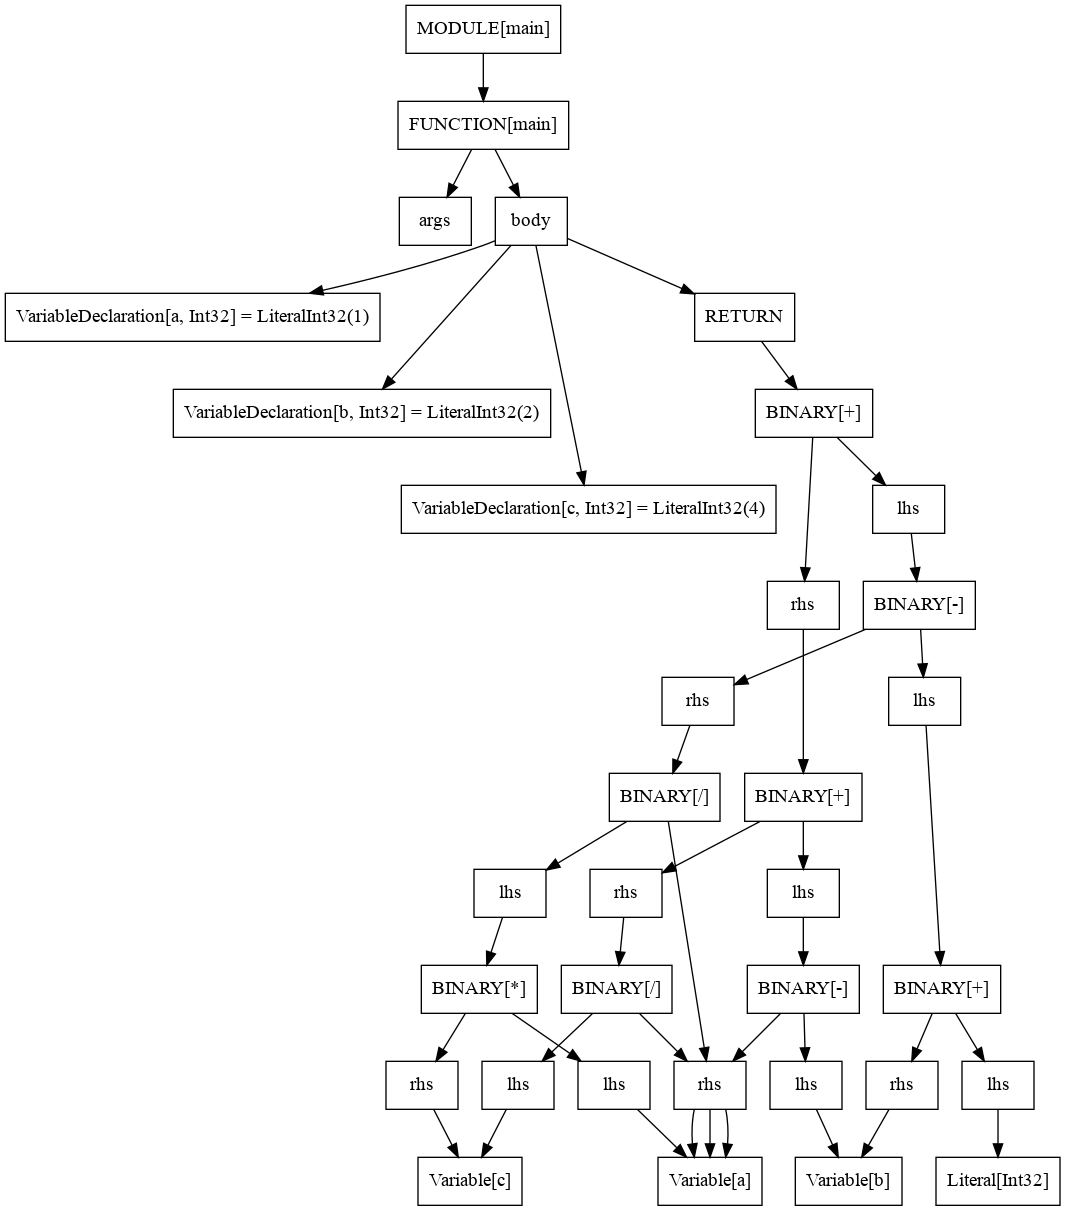

Module

In [3]:
module

In [4]:
print(builder.translate(module))

; ModuleID = "Arx"
target triple = "unknown-unknown-unknown"
target datalayout = ""

declare i32 @"putchar"(i32 %".1")

define i32 @"putchard"(i32 %".1")
{
entry:
  %".3" = call i32 @"putchar"(i32 %".1")
  ret i32 0
}

define i32 @"main"()
{
entry:
  %"c" = alloca i32
  %"b" = alloca i32
  %"a" = alloca i32
  store i32 1, i32* %"a"
  store i32 2, i32* %"b"
  store i32 4, i32* %"c"
  %"b.1" = load i32, i32* %"b"
  %"addtmp" = add i32 1, %"b.1"
  %"a.1" = load i32, i32* %"a"
  %"c.1" = load i32, i32* %"c"
  %"multmp" = mul i32 %"a.1", %"c.1"
  %"a.2" = load i32, i32* %"a"
  %"divtmp" = sdiv i32 %"multmp", %"a.2"
  %"subtmp" = sub i32 %"addtmp", %"divtmp"
  %"b.2" = load i32, i32* %"b"
  %"a.3" = load i32, i32* %"a"
  %"subtmp.1" = sub i32 %"b.2", %"a.3"
  %"c.2" = load i32, i32* %"c"
  %"a.4" = load i32, i32* %"a"
  %"divtmp.1" = sdiv i32 %"c.2", %"a.4"
  %"addtmp.1" = add i32 %"subtmp.1", %"divtmp.1"
  %"addtmp.2" = add i32 %"subtmp", %"addtmp.1"
  ret i32 %"addtmp.2"
}

